# Plan-Merging-Project-Sauerbrei-Raatschen
## Notebook for visualising data

### Setting up the project

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure

In [2]:
#df = pd.read_csv("./solvers/results.csv")
df = pd.read_csv("./results.csv")

allSolver = ["IS","PP","CBS-SOC","GICBS-SOC","ICBS-SOC","MCBS-SOC","MICBS-SOC","CBS-MS","GICBS-MS","ICBS-MS","MCBS-MS","MICBS-MS"]

In [3]:
#Splitting data by solver 

#Dataframe of sequential planning
spdf = df[df['solver'] == 'IS']

#Dataframe of prioritized planning
ppdf = df[df['solver'] == 'PP']

#Dataframe of cbs
cbsdf = df[df['solver'] == 'CBS-SOC']

singledf= {}

for solver in allSolver:
    singledf[solver] = df[df['solver'] == solver]

In [4]:
#Joining data by instance

combineddf = singledf[allSolver[0]].set_index('instance').add_suffix("_"+allSolver[0])

for i in range(1,len(allSolver)):

    combineddf = combineddf.join(singledf[allSolver[i]].set_index('instance').add_suffix('_'+allSolver[i]),lsuffix="",rsuffix="")

combineddf.head(-4)

,tag_IS,solver_IS,makespan_IS,norm_makespan_IS,soc_IS,norm_soc_IS,total_moves_IS,norm_total_moves_IS,exec_time_IS,satisfied_IS,...,tag_MICBS-MS,solver_MICBS-MS,makespan_MICBS-MS,norm_makespan_MICBS-MS,soc_MICBS-MS,norm_soc_MICBS-MS,total_moves_MICBS-MS,norm_total_moves_MICBS-MS,exec_time_MICBS-MS,satisfied_MICBS-MS
instance,,,,,,,,,,,,,,,,,,,,,
edge_cl_instance.lp,0,IS,12,1.500000,12,1.500000,18,1.125,0.053104,True,...,0.0,MICBS-MS,12.0,1.500000,12.0,1.500000,18.0,1.125,0.186212,True
edge_cl_instance.lp,0,IS,12,1.500000,12,1.500000,18,1.125,0.053104,True,...,0.0,MICBS-MS,12.0,1.500000,12.0,1.500000,18.0,1.125,0.186212,True
edge_cl_instance.lp,0,IS,12,1.500000,12,1.500000,18,1.125,0.053104,True,...,0.0,MICBS-MS,12.0,1.500000,12.0,1.500000,18.0,1.125,0.186212,True
edge_cl_instance.lp,0,IS,12,1.500000,12,1.500000,18,1.125,0.053104,True,...,0.0,MICBS-MS,12.0,1.500000,12.0,1.500000,18.0,1.125,0.186212,True
edge_cl_instance.lp,0,IS,12,1.500000,12,1.500000,18,1.125,0.053104,True,...,0.0,MICBS-MS,12.0,1.500000,12.0,1.500000,18.0,1.125,0.186212,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test2.4,0,IS,10,1.000000,10,1.000000,40,1.000,0.135093,True,...,0.0,MICBS-MS,10.0,1.000000,10.0,1.000000,40.0,1.000,0.336197,True
test3.1,0,IS,9,1.000000,9,1.000000,42,1.000,0.133324,True,...,0.0,MICBS-MS,9.0,1.000000,9.0,1.000000,42.0,1.000,0.211929,True
test3.2,0,IS,7,1.166667,7,1.166667,38,1.000,1.131884,True,...,0.0,MICBS-MS,7.0,1.166667,7.0,1.166667,38.0,1.000,1.135601,True


## Functions

0.1723715749999996
4
4
4
4
4
4
4
4
4
4
4
4


<Figure size 4000x4000 with 0 Axes>

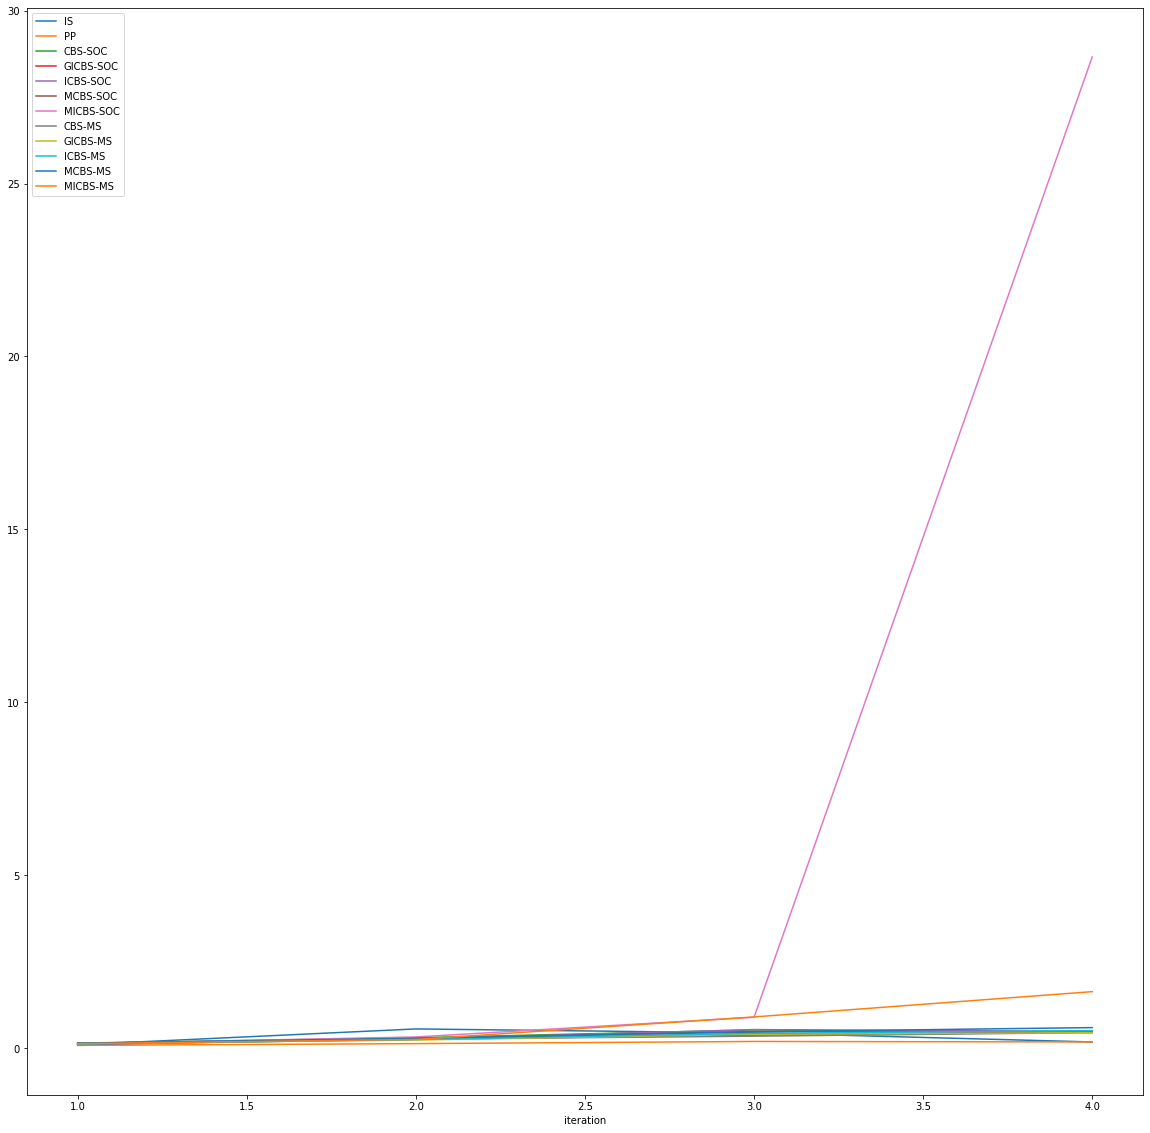

In [14]:
def plotInstance(instanceName : str, df : pd.DataFrame):
    """
    plot_Instance Plots all the results of all solvers for a specific instance

    :param instanceName: Name of the instance to analyze
    :param df: Dataframe indexed by instance
    :return: None
    """ 
    
    newdf = df.filter(like = instanceName, axis = 0)
    
    exec_time = []
    
    for i in allSolver:
        exec_time.append("exec_time_"+i)
    
    ax = newdf[exec_time].plot.bar(title = 'Exec_time of all solvers')


def averageTime(instanceName : str,solverName : str, df : pd.DataFrame, iterationNumber = -1):
    """
    plot_Instance Plots all the results of all solvers for a specific instance

    :param instanceName: Name of the instance
    :param solverName: Name of the used solver, e.g. "SP", "PP", "CBS"
    :param df: Dataframe indexed by instance
    :param iterationNumber: (Optional) number of iteration to be looked at
    :return: None
    """ 
    if iterationNumber != -1: instanceName = instanceName+str(iterationNumber)
        
    newdf = df.filter(like = instanceName, axis = 0)
    newdf = newdf['exec_time_'+solverName]
    
    return newdf.sum() / newdf.size

def plotScale(instanceName : str, df : pd.DataFrame):
    """
    plot_Instance Plots all the results of all solvers for a specific instance

    :param instanceName: Name of the instance
    :param df: Dataframe indexed by instance
    :return: A list, containing for every solver a dataframe, with the avg_time per iteration
    """ 
    newdf = df.filter(like = instanceName, axis = 0)

    allResults = []
    
    for solver in allSolver:
        solverResult = pd.DataFrame(columns = ['iteration','avg_exec_time'])
        numberOfIterations = len(newdf.filter(like = instanceName+"1",axis = 0))
        print(numberOfIterations)
        for i in range(1,numberOfIterations+1):
            avg_time = averageTime(instanceName,solver, newdf, iterationNumber = i)
            solverResult = solverResult.append(pd.DataFrame({'iteration':[i],'avg_exec_time':[avg_time]}),ignore_index=True)
        allResults.append(solverResult)
        
    ax = allResults[0].plot(x='iteration',y='avg_exec_time',label=allSolver[0])
    for dataNumber in range(1,len(allResults)):
        allResults[dataNumber].plot(ax=ax,x='iteration',y='avg_exec_time',label=allSolver[dataNumber],figsize=(20,20))

    
    return allResults
    

    
    
#plotInstance("edge_cl_instance.lp", combineddf)
#print(averageTime("test","IS", combineddf, iterationNumber = 3))
print(averageTime("test4","IS", combineddf))
figure(figsize=(20, 20), dpi=200)
dataOfThePlot = plotScale("test",combineddf)


### Plotting data

<AxesSubplot:title={'center':'Exec_time for cbs'}, xlabel='instance'>

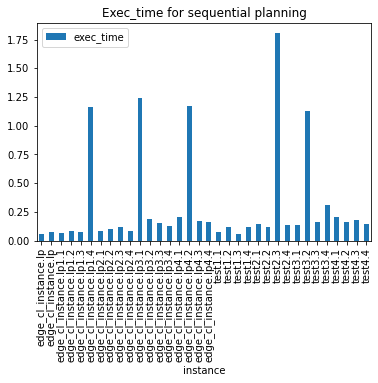

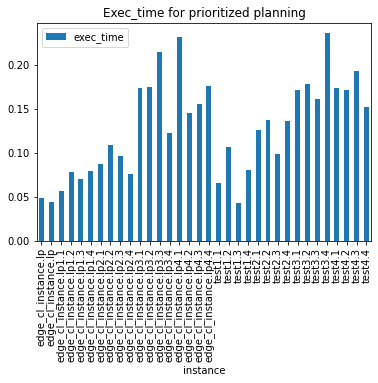

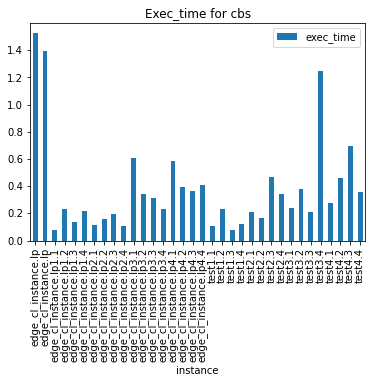

In [6]:
spdf[['instance','exec_time']].plot.bar( x = 'instance', title = 'Exec_time for sequential planning')
ppdf[['instance','exec_time']].plot.bar( x = 'instance', title = 'Exec_time for prioritized planning')
cbsdf[['instance','exec_time']].plot.bar( x = 'instance', title = 'Exec_time for cbs')

In [7]:
combineddf[['exec_time_SP','exec_time_PP','exec_time_CBS' ]].plot.bar(title = 'Exec_time of all solvers')

KeyError: "['exec_time_CBS', 'exec_time_SP'] not in index"